In [50]:
import pandas as pd
import numpy as np
import os
import math
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
filepath = os.path.abspath('')
filePaths = {
    'ground':filepath+'\\pendulumGround.csv',
    'first':filepath+'\\pendulum114firstfromground.csv',
    'second':filepath+'\\pendulumlowerthan1142ndfromground.csv'
    }
data = {}
dataInfo = {'ground':{'length':(201.3+18.4)/100},
            'first':{'length':(114.5+60)/100},
            'second':{'length':(142.7+45)/100}
        }

In [51]:
for i in filePaths:
    data[i]=pd.read_csv(filePaths[i])

In [52]:
display(data['ground'])

,Time(ms),Hall(mV),B(mT)
0,0,537.1094,-0.49
1,2,537.1094,-0.49
2,4,537.1094,-0.49
3,12,537.1094,-0.49
4,31,537.1094,-0.49
...,...,...,...
5366,121490,3686.5234,31.01
5367,121515,3959.9609,33.74
5368,121540,3916.0156,33.30
5369,121565,3583.9843,29.98


In [53]:
def gForce(period,length):
    return (((period/(2*math.pi))**2)/length)**(-1)

In [54]:
print(gForce(2,2))

19.739208802178712


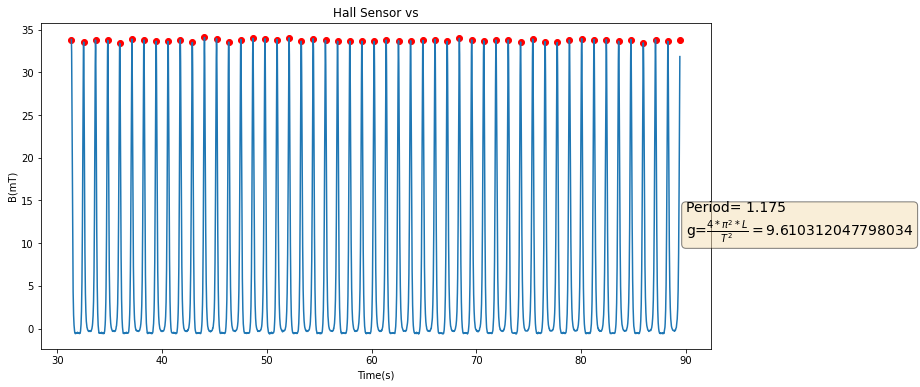

T = 1175ms
9.610312047798034


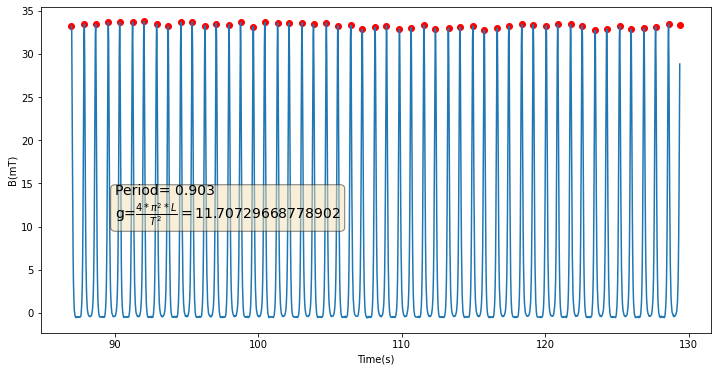

T = 903ms
11.70729668778902


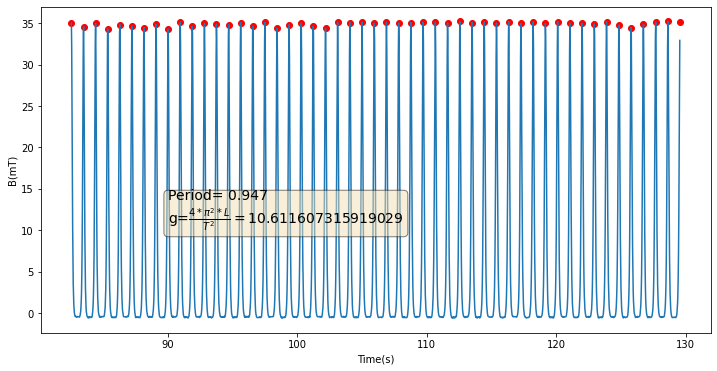

T = 947ms
10.611607315919029


In [55]:
lengthList = []
periodList = []
for i in data:
    smallData = data[i]
    peaks = list(find_peaks(smallData['B(mT)']))
    filteredPeaks = [x for x in peaks[0] if smallData['B(mT)'].iloc[x]>0]
    #filteredPeaks = list(peaks[0])
    while len(filteredPeaks)>52:
        filteredPeaks.pop(0)
        filteredPeaks.pop()
    peakData = smallData.loc[filteredPeaks]
    firstT =peakData.at[peakData.index[0],'Time(ms)']
    secondT =peakData.at[peakData.index[1],'Time(ms)']
    lastT=peakData.at[peakData.index[len(filteredPeaks)-1],'Time(ms)']

    firstI = smallData.loc[smallData['Time(ms)'] == firstT].index
    secondI = smallData.loc[smallData['Time(ms)'] == lastT].index

    trimmedData = smallData.iloc[firstI[0]:secondI[0]]
    xRaw = trimmedData['Time(ms)']/1000
    yRaw = trimmedData['B(mT)']
    x2 = peakData['Time(ms)']/1000
    y2 = peakData['B(mT)']
    plt.figure(figsize=(12,6))
    if i == 'ground':
        plt.title('Hall Sensor vs')
    plt.xlabel('Time(s)')
    plt.ylabel('B(mT)')
    plt.scatter(x2,y2,c='r')
    plt.plot(xRaw,yRaw)
    strText = '\n'.join((
                'Period= ' + str(((secondT-firstT)/1000)),
                r'g=$\frac{4*\pi^2*L}{T^2} = $'+str(gForce(dataInfo[i]['length'],(secondT-firstT)/1000))
            ))
    plt.text(90,15,strText,fontsize=14,verticalalignment='top',bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.show()
    print('T = ' + str(secondT-firstT) + 'ms')
    print(gForce(dataInfo[i]['length'],(secondT-firstT)/1000))

    lengthList.append(float(dataInfo[i]['length']))
    periodList.append(float((secondT-firstT)/1000))
lengthList = np.array(lengthList)
periodList = np.array(periodList)

In [56]:
for i in lengthList:
    print(i)
print('')
for i in periodList:
    print(i)

2.197
1.745
1.8769999999999998

1.175
0.903
0.947


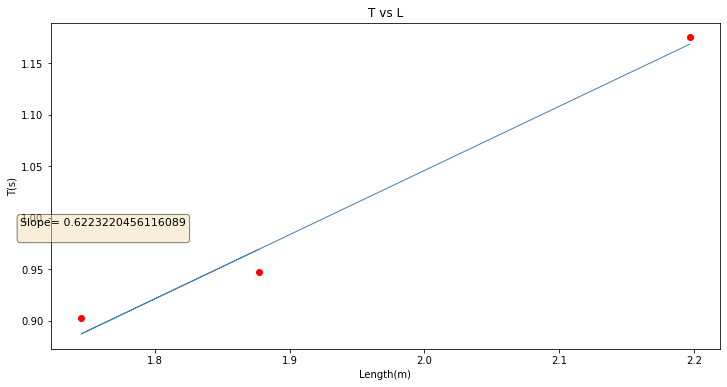

In [57]:
plt.figure(figsize=(12,6))
plt.title('T vs L')
plt.xlabel('Length(m)')
plt.ylabel('T(s)')
a, b = np.polyfit(lengthList,periodList, 1)
plt.plot((lengthList), a*(lengthList)+b, color='steelblue', linewidth=1)
plt.scatter(lengthList,periodList,c='r')
strText = '\n'.join((
                'Slope= ' + str(a),
                ''
            ))
plt.text(1.7,1,strText,fontsize=11,verticalalignment='top',bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

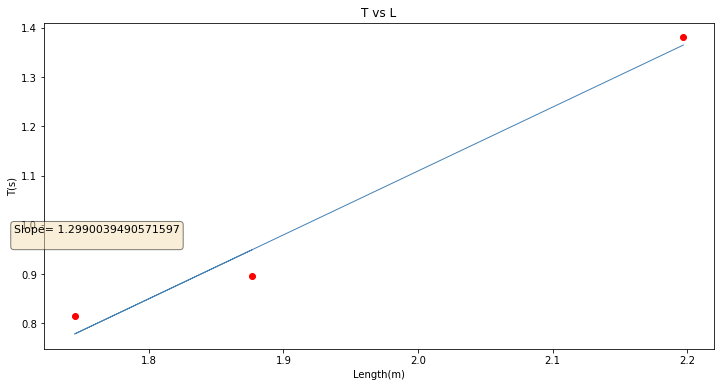

In [58]:
periodList2=periodList**2
plt.figure(figsize=(12,6))
plt.title('T vs L')
plt.xlabel('Length(m)')
plt.ylabel('T(s)')
a, b = np.polyfit(lengthList,periodList2, 1)
plt.plot((lengthList), a*(lengthList)+b, color='steelblue', linewidth=1)
plt.scatter(lengthList,periodList2,c='r')
strText = '\n'.join((
                'Slope= ' + str(a),
                ''
            ))
plt.text(1.7,1,strText,fontsize=11,verticalalignment='top',bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()